## Comparison of:  
(1) adaptive variable time steps  
(2) fixed time steps   
(3) exact solution  
### for the reaction `A <-> B`,
with 1st-order kinetics in both directions, taken to equilibrium.

This is a continuation of the experiments `react_2_a` (fixed time steps) and  `react_2_b` (adaptive variable time steps)

**Background**: please see experiments `react_2_a` and `react_2_b`   

In [1]:
LAST_REVISED = "Aug. 19, 2024"
LIFE123_VERSION = "1.0.0.beta.38"    # Version this experiment is based on

In [2]:
#import set_path              # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path 

from life123 import check_version, ChemData, UniformCompartment

import numpy as np
import plotly.graph_objects as go
from life123 import ReactionKinetics
from life123.visualization.plotly_helper import PlotlyHelper

In [4]:
check_version(LIFE123_VERSION)

OK


## Common set up for the chemicals and the reaction (used by all the simulations)

In [5]:
# Instantiate the simulator and specify the chemicals
chem_data = ChemData()

# Reaction A <-> B , with 1st-order kinetics in both directions
chem_data.add_reaction(reactants="A", products="B", 
                  forward_rate=3., reverse_rate=2.)

chem_data.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A <-> B  (kF = 3 / kR = 2 / delta_G = -1,005.1 / K = 1.5) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {'B', 'A'}


# PART 1 - VARIABLE TIME STEPS
We'll do this part first, because the number of steps taken is unpredictable;  
we'll note that number, and in Part 2 we'll do exactly that same number of fixed steps

In [6]:
dynamics_variable = UniformCompartment(chem_data=chem_data, preset="mid")

# Initial concentrations of all the chemicals
dynamics_variable.set_conc({"A": 10., "B": 50.})

dynamics_variable.describe_state()

SYSTEM STATE at Time t = 0:
2 species:
  Species 0 (A). Conc: 10.0
  Species 1 (B). Conc: 50.0
Set of chemicals involved in reactions: {'B', 'A'}


### Run the reaction (VARIABLE adaptive time steps)

In [7]:
dynamics_variable.single_compartment_react(initial_step=0.1, target_end_time=1.2,
                                  variable_steps=True, 
                                  snapshots={"initial_caption": "1st reaction step",
                                             "final_caption": "last reaction step"}
                                  )

Some steps were backtracked and re-done, to prevent negative concentrations or excessively large concentration changes
19 total step(s) taken
Number of step re-do's because of elective soft aborts: 2
Norm usage: {'norm_A': 17, 'norm_B': 15, 'norm_C': 15, 'norm_D': 15}


#### The flag _variable_steps_ automatically adjusts up or down the time steps
In part 2, we'll remember that it took 19 steps

In [8]:
dynamics_variable.get_history()   # The system's history, saved during the run of single_compartment_react()

SYSTEM TIME          A          B             caption
0      0.000000  10.000000  50.000000   Initialized state
1      0.016000  11.120000  48.880000   1st reaction step
2      0.032000  12.150400  47.849600                    
3      0.048000  13.098368  46.901632                    
4      0.067200  14.144925  45.855075                    
5      0.086400  15.091012  44.908988                    
6      0.109440  16.117327  43.882673                    
7      0.132480  17.025411  42.974589                    
8      0.160128  17.989578  42.010422                    
9      0.193306  18.986635  41.013365                    
10     0.233119  19.984624  40.015376                    
11     0.280894  20.943812  39.056188                    
12     0.338225  21.819882  38.180118                    
13     0.407022  22.569810  37.430190                    
14     0.489579  23.160168  36.839832                    
15     0.588647  23.576169  36.423831                    
16     0.707528  23.828097  36.171903                    
17     0.850186  23.950713  36.049287                    
18     1.021375  23.992900  36.007100                    
19     1.226802  24.000193  35.999807  last reaction step

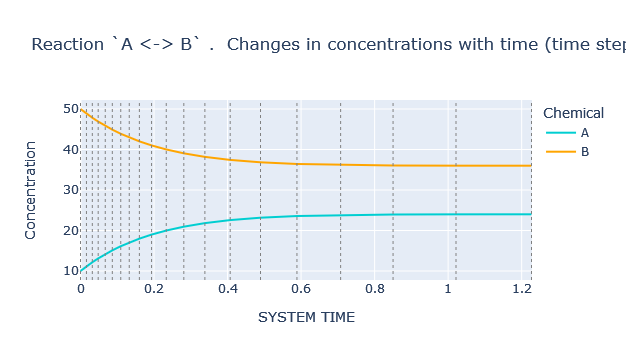

In [9]:
dynamics_variable.plot_history(colors=['darkturquoise', 'orange'], show_intervals=True)

#### Notice how the reaction proceeds in smaller steps in the early times, when [A] and [B] are changing much more rapidly
That resulted from passing the flag _variable_steps=True_ to single_compartment_react()

# PART 2 - FIXED TIME STEPS

#### This is a re-do of the above simulation simulation, but with a fixed time step
The fixed time step is chosen to attain the same total number of data points as obtained with the variable time steps of part 1

In [10]:
dynamics_fixed = UniformCompartment(chem_data=chem_data)   # Re-use same chemicals and reactions of part 1

In [11]:
# Initial concentrations of all the chemicals
dynamics_fixed.set_conc({"A": 10., "B": 50.})

dynamics_fixed.describe_state()

SYSTEM STATE at Time t = 0:
2 species:
  Species 0 (A). Conc: 10.0
  Species 1 (B). Conc: 50.0
Set of chemicals involved in reactions: {'B', 'A'}


### Run the reaction (FIXED time steps)

In [12]:
# Matching the total number of steps to the earlier, variable-step simulation
dynamics_fixed.single_compartment_react(n_steps=19, target_end_time=1.2,
                                        variable_steps=False,
                                        snapshots={"initial_caption": "1st reaction step",
                                                   "final_caption": "last reaction step"})

19 total step(s) taken


In [13]:
dynamics_fixed.get_history()   # The system's history, saved during the run of single_compartment_react()

SYSTEM TIME          A          B             caption
0      0.000000  10.000000  50.000000   Initialized state
1      0.063158  14.421053  45.578947   1st reaction step
2      0.126316  17.445983  42.554017                    
3      0.189474  19.515673  40.484327                    
4      0.252632  20.931776  39.068224                    
5      0.315789  21.900689  38.099311                    
6      0.378947  22.563629  37.436371                    
7      0.442105  23.017220  36.982780                    
8      0.505263  23.327572  36.672428                    
9      0.568421  23.539917  36.460083                    
10     0.631579  23.685207  36.314793                    
11     0.694737  23.784615  36.215385                    
12     0.757895  23.852631  36.147369                    
13     0.821053  23.899169  36.100831                    
14     0.884211  23.931010  36.068990                    
15     0.947368  23.952796  36.047204                    
16     1.010526  23.967703  36.032297                    
17     1.073684  23.977902  36.022098                    
18     1.136842  23.984880  36.015120                    
19     1.200000  23.989655  36.010345  last reaction step

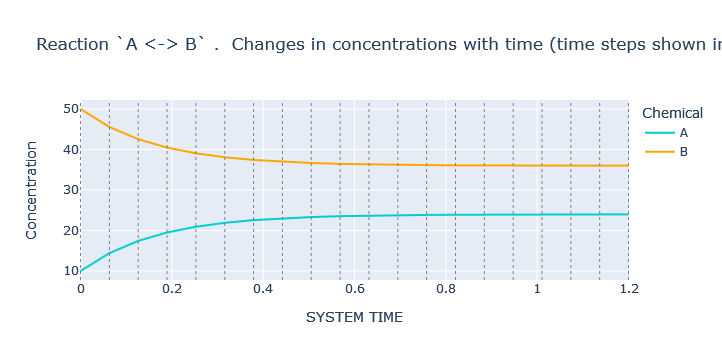

In [14]:
dynamics_fixed.plot_history(colors=['darkturquoise', 'orange'], show_intervals=True)

Notice how grid points are being "wasted" on the tail part of the simulation, where little is happening - grid points that would be best used in the early part, as was done by the variable-step simulation of Part 1

# PART 3 - EXACT Solution

In [15]:
t_arr = np.linspace(0., 1.2, 41)   # A relatively dense uniform grid across our time range
t_arr

array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 ,
       0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6 , 0.63,
       0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.9 , 0.93, 0.96,
       0.99, 1.02, 1.05, 1.08, 1.11, 1.14, 1.17, 1.2 ])

In [19]:
# The exact solution is available for a simple scenario like the one we're simulating here
rxn = chem_data.get_reaction(0)   # Object of type life123.reaction.Reaction

A_exact, B_exact = ReactionKinetics.solve_exactly(rxn=rxn, A0=10., B0=50., t_arr=t_arr)

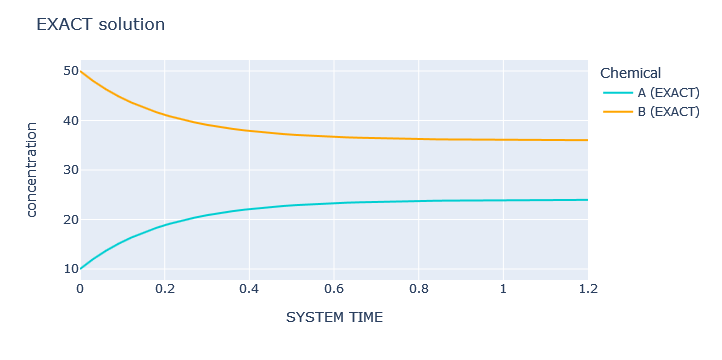

In [20]:
fig_exact = PlotlyHelper.plot_curves(x=t_arr, y=[A_exact, B_exact], title="EXACT solution", xlabel="SYSTEM TIME", ylabel="concentration", 
                                     legend_title="Chemical", curve_labels=["A (EXACT)", "B (EXACT)"],
                                     colors=["darkturquoise", "orange"], show=True)

# PART 4 - Comparing Variable Steps, Fixed Steps and Exact Solution   
#### To avoid clutter, we'll just plot [A]

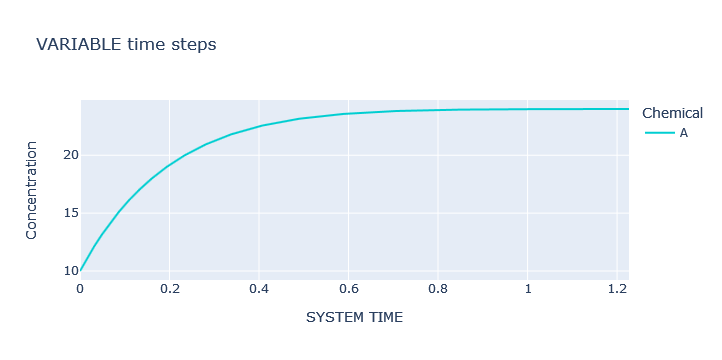

In [21]:
fig_variable = dynamics_variable.plot_history(chemicals=['A'], colors='darkturquoise', title="VARIABLE time steps", show=True)     # Repeat a portion of the diagram seen in Part 1

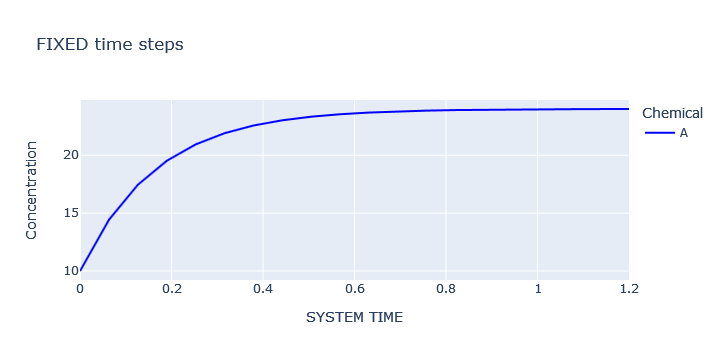

In [22]:
fig_fixed = dynamics_fixed.plot_history(chemicals=['A'], colors='blue', title="FIXED time steps", show=True)         # Repeat a portion of the diagram seen in Part 2

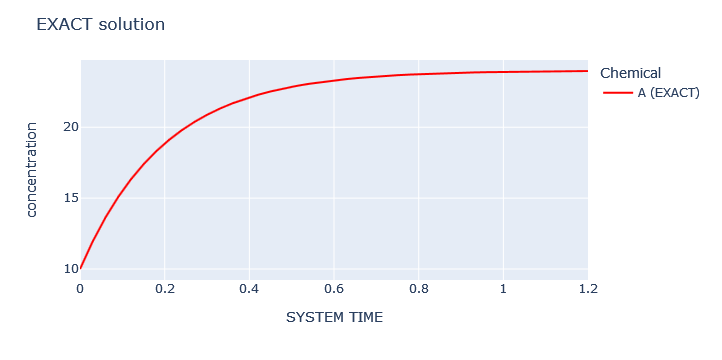

In [23]:
fig_exact = PlotlyHelper.plot_curves(x=t_arr, y=A_exact, title="EXACT solution", xlabel="SYSTEM TIME", ylabel="concentration", 
                                     curve_labels="A (EXACT)", legend_title="Chemical",
                                     colors="red", show=True)  # Repeat a portion of the diagram seen in Part 3

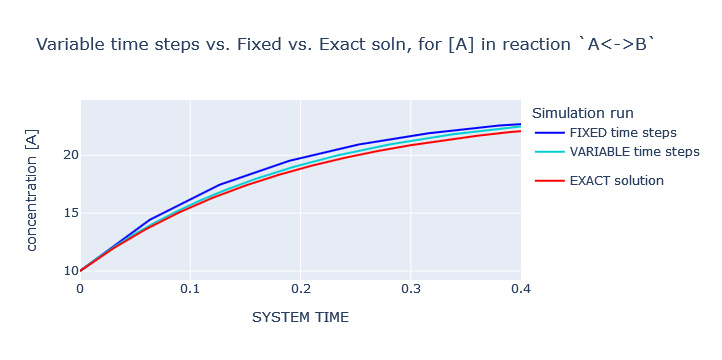

In [24]:
PlotlyHelper.combine_plots(fig_list=[fig_fixed, fig_variable, fig_exact],
                           xrange=[0, 0.4], ylabel="concentration [A]",
                           title="Variable time steps vs. Fixed vs. Exact soln, for [A] in reaction `A<->B`",
                           legend_title="Simulation run")    # All the 3 plots put together: show only the initial part (but it's all there; you can zoom out!)

#### Not surprisingly, the adaptive variable time steps outperform the fixed ones (for the same total number of points in the time grid), at times when there's pronounced change.  
If you zoom out on the plot (by hovering on it, and using the Plotly controls that appear on the right, above), you can see all 3 curves essentially converging as the reaction approaches equilibrium.

# PART 5 - Repeating Part 4 with a coarser grid
#### The advantage of adaptive variable step will be even more prominent

In [26]:
# A coarser version of the variable-step simulation of Part 1
dynamics_variable_new = UniformCompartment(chem_data=chem_data, preset="fast")   # Re-use same chemicals and reactions of part 2

dynamics_variable_new.set_conc([10., 50.])

In [27]:
dynamics_variable_new.single_compartment_react(initial_step=0.1, target_end_time=1.2,
                                              variable_steps=True,
                                              snapshots={"initial_caption": "1st reaction step",
                                                         "final_caption": "last reaction step"}
                                              )

Some steps were backtracked and re-done, to prevent negative concentrations or excessively large concentration changes
14 total step(s) taken
Number of step re-do's because of elective soft aborts: 3
Norm usage: {'norm_A': 13, 'norm_B': 9, 'norm_C': 9, 'norm_D': 9}


### Note that the variable-step simulation is now taking 14 steps instead of the earlier 19

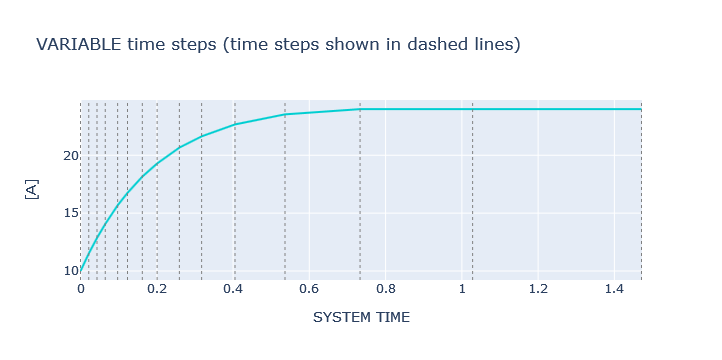

In [28]:
fig_variable = dynamics_variable_new.plot_history(chemicals='A', colors='darkturquoise', title="VARIABLE time steps",
                                              show_intervals=True, show=True)

In [29]:
# Now, a coarser version of the fixed-step simulation of Part 2
dynamics_fixed_new = UniformCompartment(chem_data=dynamics_fixed.chem_data)   # Re-using same chemicals and reactions of part 2

dynamics_fixed_new.set_conc([10., 50.])

In [30]:
# Matching the NEW total number of steps
dynamics_fixed_new.single_compartment_react(n_steps=14, target_end_time=1.2,
                                        variable_steps=False,
                                        snapshots={"initial_caption": "1st reaction step",
                                                   "final_caption": "last reaction step"})

14 total step(s) taken


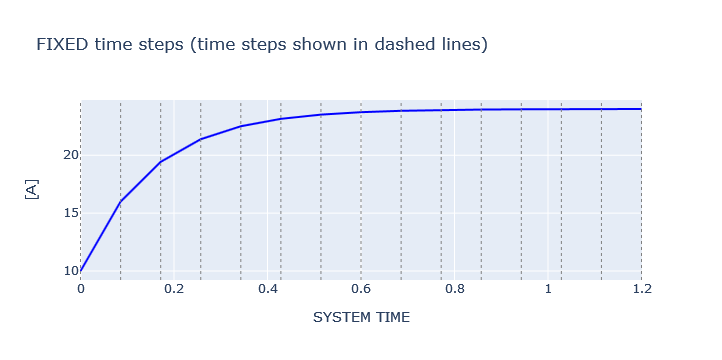

In [31]:
fig_fixed = dynamics_fixed_new.plot_history(chemicals='A', colors='blue', title="FIXED time steps",
                                        show_intervals=True, show=True)

#### Notice the jaggedness at the left (jaggedness NOT present with the same number of total grid points, with the variable-step simulation)

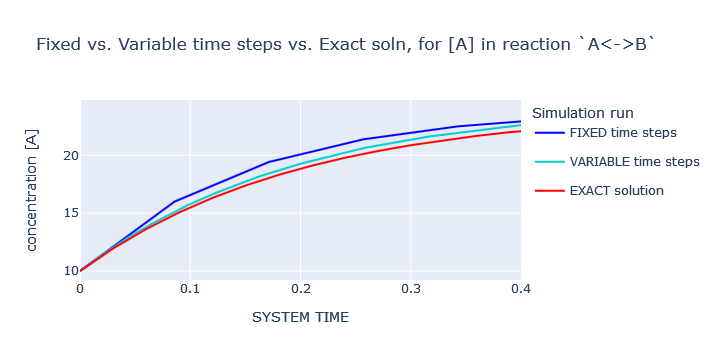

In [32]:
PlotlyHelper.combine_plots(fig_list=[fig_fixed, fig_variable, fig_exact],
                           curve_labels = ["FIXED time steps", "VARIABLE time steps", "EXACT solution"],
                           xrange=[0, 0.4], ylabel="concentration [A]",
                           title="Fixed vs. Variable time steps vs. Exact soln, for [A] in reaction `A<->B`",
                           legend_title="Simulation run")

### With fewer grid points, the advantage of adaptive variable timesteps is more pronounced  
If you zoom out the plot, and scroll to later times, you can see that the advantage later disappears when there's "less happening" (change-wise), closer to equilibrium